In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer

/Users/lola/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
import pandas as pd
import numpy as ns

In [5]:
df = pd.read_csv('winemag-data_first150k.csv')

In [6]:
description = df['description'].values.tolist()

In [7]:
sid = SentimentIntensityAnalyzer()
for idx, document in df.iterrows():
    ss = sid.polarity_scores(document['description'])
    df.loc[idx, 'sentiment'] = ss['compound']

In [8]:
list(df.columns.values)

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery',
 'sentiment']

In [ ]:
df.head()

In [ ]:
df.sort_values('sentiment')

In [62]:
df= pd.read_csv('./wine_sentiment.csv')

In [63]:
# drop any NA values from the sentiment column
df = df.dropna(subset= ['sentiment'])

In [64]:
# one country check
df[df['country'] == 'US']['sentiment'].mean()

0.5566157235123721

In [65]:
# make a unique list of countries
c = df['country'].unique()

In [66]:
#calculate the mean for every country in our list and add the means to a data frame
mean_list = {}
for item in c:
    temp_mean = df[df['country'] == item]['sentiment'].mean()
    mean_list[item] = temp_mean

df_mean = pd.DataFrame.from_dict(mean_list, orient='index')
df_mean = df_mean.sort_values(0).dropna()

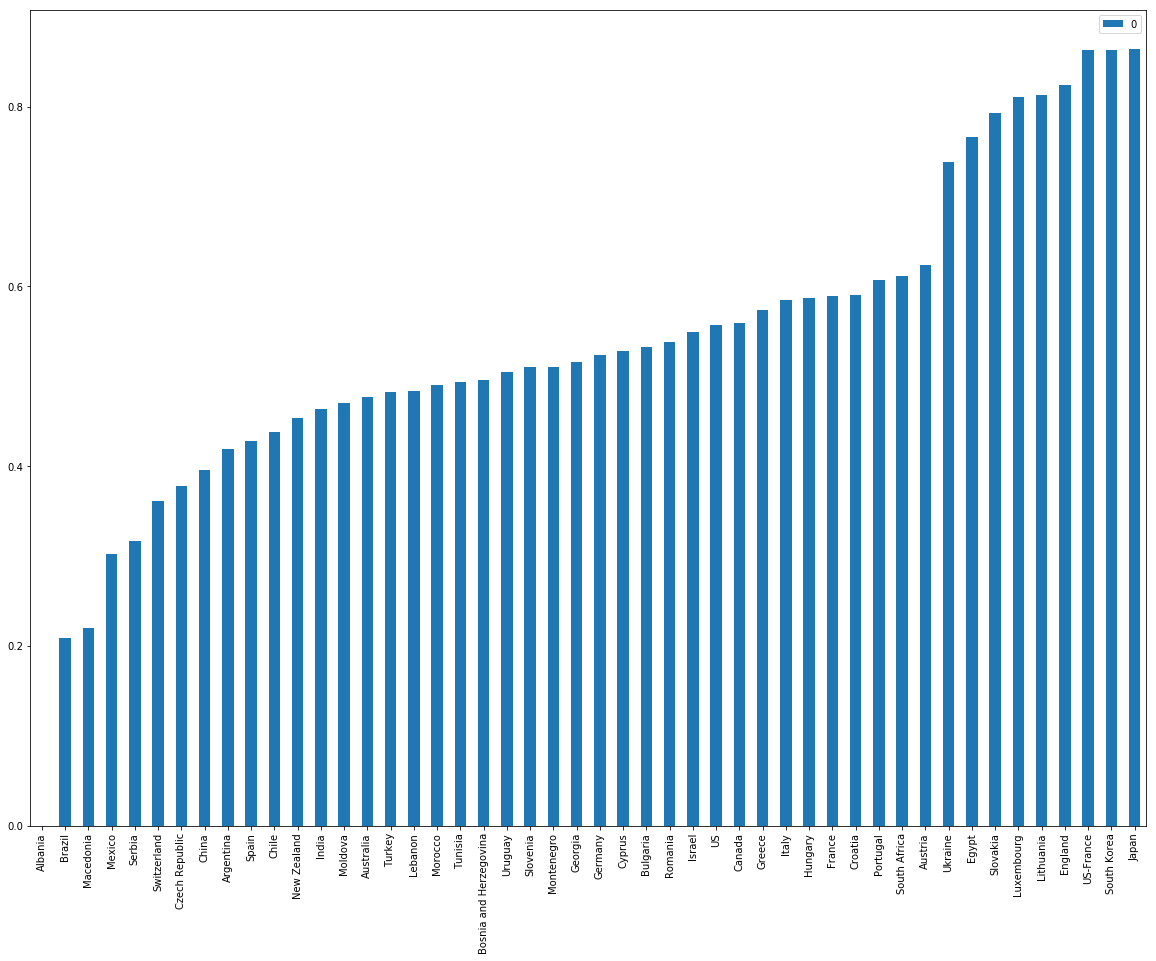

In [67]:
# plot means in bar chart!
import matplotlib.pyplot as plt
% matplotlib inline
df_mean.plot(kind= 'bar', figsize= (20,15))

In [ ]:
# this has a 0 value probably some problems with the data
df[df['country'] == 'Albania']['sentiment']

In [73]:
# same thing for every variety reviewed
unique_var = df['variety'].unique()
varietymap = {}
for item in unique_var:
    temp_mean = df[df['variety'] == item]['sentiment'].mean()
    varietymap[item] = temp_mean

variety_mean = pd.DataFrame.from_dict(varietymap, orient='index')
variety_mean = variety_mean.sort_values(0).dropna()

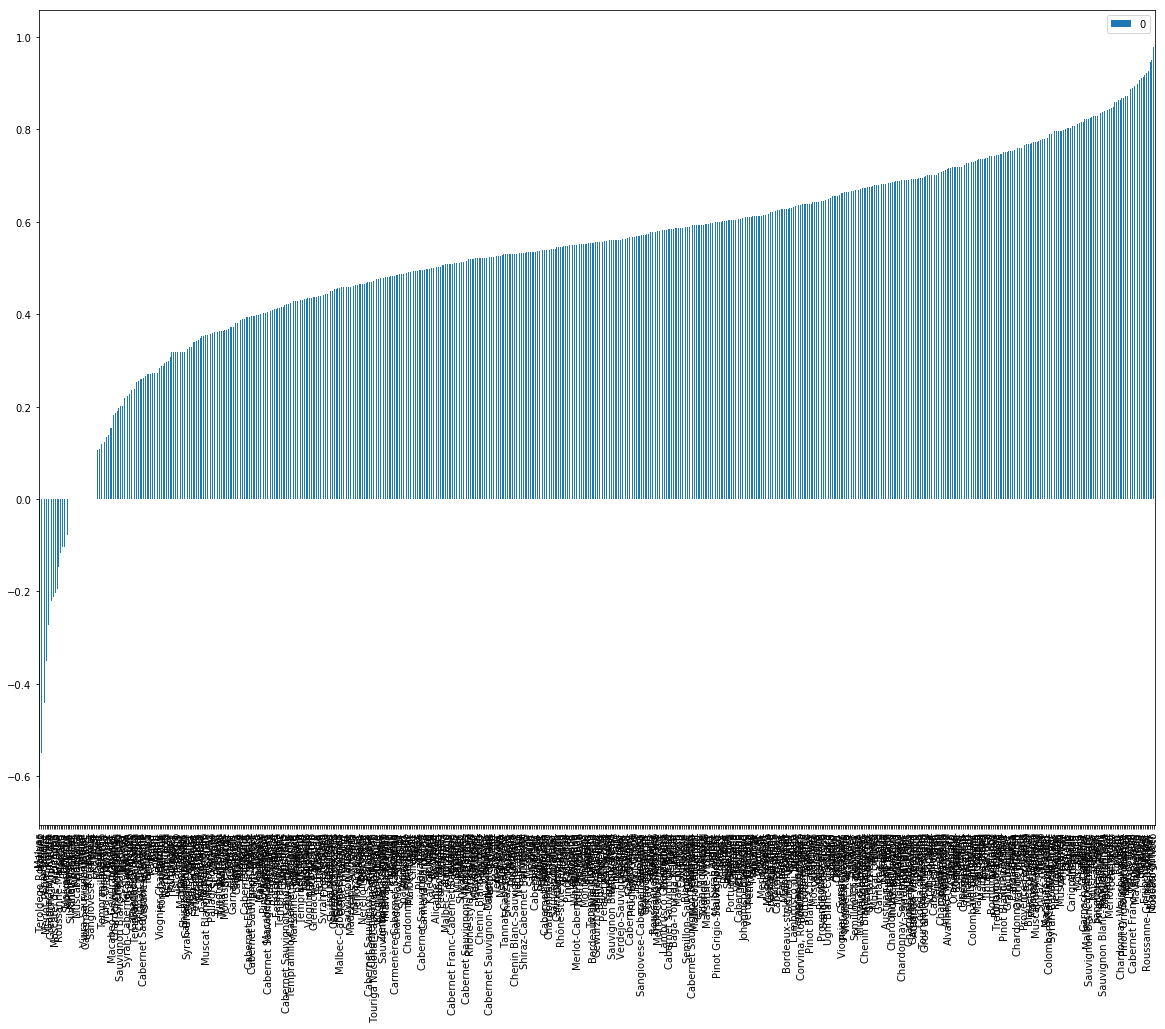

In [74]:
variety_mean.plot(kind= 'bar', figsize= (20,15))

In [75]:
#printing varieties because the x-axis is unreadable
print(variety_mean)

                                       0
Malvar                         -0.625500
Teroldego Rotaliano            -0.549900
Jacquez                        -0.449700
Chardonelle                    -0.440400
Merlot-Petite Verdot           -0.350600
Kuntra                         -0.273200
Garnacha Tintorera             -0.273200
Grenache-Mourvèdre             -0.221350
Picapoll                       -0.212167
Moscatel de Alejandría         -0.202300
Airen                          -0.194150
Roussanne-Marsanne             -0.146800
Mazuelo                        -0.117700
Forcallà                       -0.102700
Carineña                       -0.102700
Malvasia-Viura                 -0.096650
Saperavi-Merlot                -0.077200
Huxelrebe                       0.000000
Silvaner-Traminer               0.000000
Kinali Yapincak                 0.000000
Chardonel                       0.000000
Mandilaria                      0.000000
Muscat Hamburg                  0.000000
Freisa          

In [77]:
# What about every "province" aka State in the United States?
us_prov = df[df['country'] == 'US']['province'].unique()
print(us_prov)

['California' 'Oregon' 'Washington' 'Idaho' 'New York' 'Virginia'
 'Colorado' 'Arizona' 'America' 'North Carolina' 'New Mexico' 'Missouri'
 'Pennsylvania' 'Ohio' 'Massachusetts' 'New Jersey' 'Michigan' 'Texas'
 'Washington-Oregon' 'Iowa' 'Vermont' 'Connecticut' 'Kentucky' 'Nevada']


In [78]:
# Same as above.  Calculate the means of all states and graph it!
prov_map = {}
for item in us_prov:
    temp_mean = df[df['province'] == item]['sentiment'].mean()
    prov_map[item] = temp_mean

prov_mean = pd.DataFrame.from_dict(prov_map, orient='index')
prov_mean = prov_mean.sort_values(0).dropna()

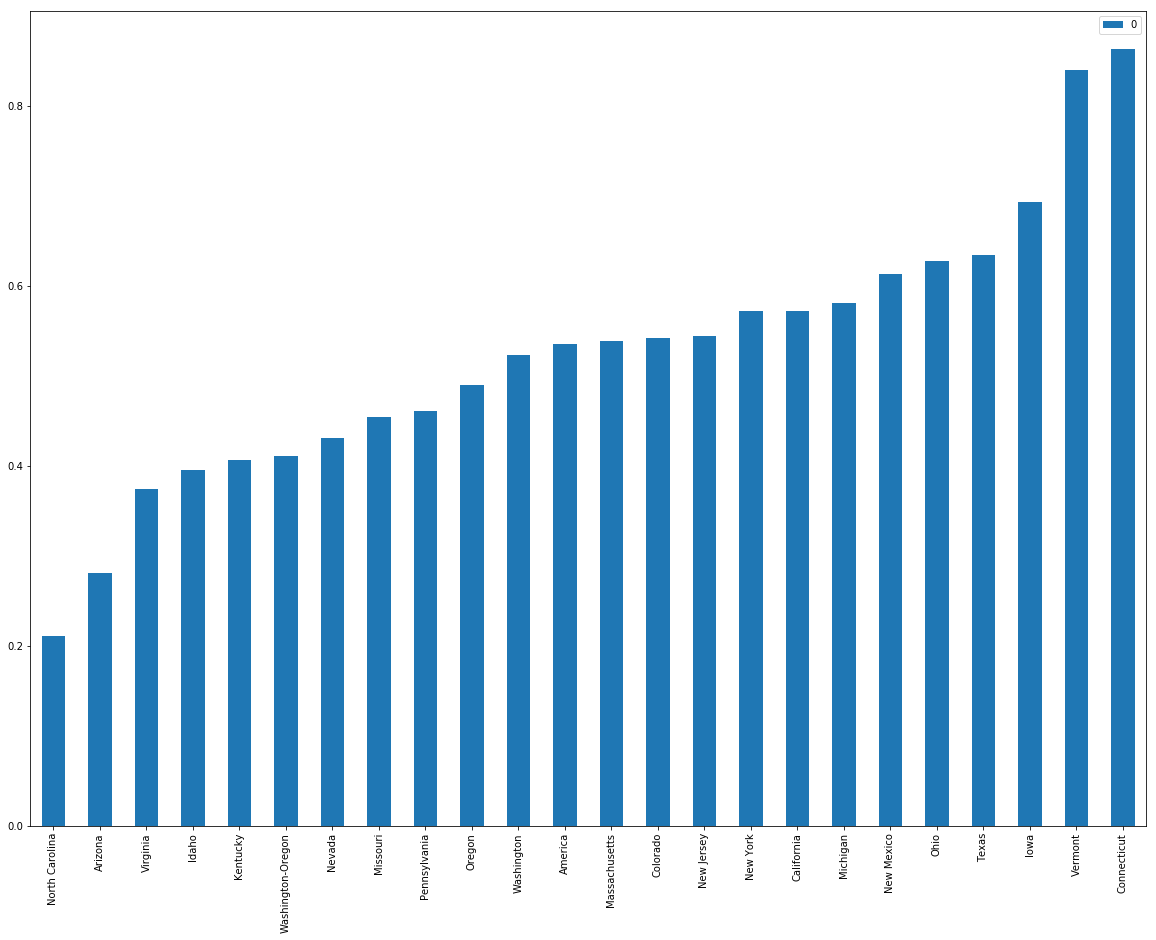

In [79]:
prov_mean.plot(kind= 'bar', figsize= (20,15))